In [6]:
import json
import pandas as pd
from dataclasses import dataclass
from typing import List
import matplotlib.pyplot as plt

@dataclass
class Trade:
    timestamp: int
    buyer: str
    seller: str
    symbol: str
    currency: str
    price: float
    quantity: int

# Read entire log file
with open('/Users/vasudev/Desktop/Projects/imc_prosperity/prosperity-imc25/rounds/round2/round2_results/e3ea576b-7011-41ef-b9e2-d07f778b99f1_final.log', 'r') as f:
    content = f.read()

# --- Parse Sandbox Logs ---
sandbox_start = content.find('Sandbox logs:')
activities_start = content.find('Activities log:')
sandbox_section = content[sandbox_start + len('Sandbox logs:'):activities_start].strip()

# Each JSON object is on a new line; wrap in array brackets
# sandbox_json = '[' + ','.join(sandbox_section.split('\n')) + ']'

# sandbox_logs = json.loads(sandbox_json)

# --- Parse Activities Log ---
trades_start = content.find('Trade History:')
activities_section = content[activities_start + len('Activities log:'):trades_start].strip()

# Read CSV section into a DataFrame
from io import StringIO
activities_df = pd.read_csv(StringIO(activities_section), sep=';')

# --- Parse Trades ---
trades_section = content[trades_start + len('Trade History:'):].strip()
trades_data = json.loads(trades_section)

# Convert to Trade objects
trades: List[Trade] = [Trade(**t) for t in trades_data]

In [26]:
#last mid price
print(activities_df[activities_df['product'] == 'RAINFOREST_RESIN']['mid_price'].iloc[-1])

10004.0


In [7]:
# day 2 trades
rfr_trades = [trade for trade in trades if trade.symbol == 'RAINFOREST_RESIN']
kelp_trades = [trade for trade in trades if trade.symbol == 'KELP']
squid_ink_trades = [trade for trade in trades if trade.symbol == 'SQUID_INK']
croissants_trades = [trade for trade in trades if trade.symbol == 'CROISSANTS']
jams_trades = [trade for trade in trades if trade.symbol == 'JAMS']
djembes_trades = [trade for trade in trades if trade.symbol == 'DJEMBES']
pic1_trades = [trade for trade in trades if trade.symbol == 'PICNIC_BASKET1']
pic2_trades = [trade for trade in trades if trade.symbol == 'PICNIC_BASKET2']

# our trades
rfr_buys = [trade for trade in rfr_trades if trade.buyer == 'SUBMISSION']
rfr_sells = [trade for trade in rfr_trades if trade.seller == 'SUBMISSION']
outstanding_rfr_position = sum(trade.quantity for trade in rfr_buys) - sum(trade.quantity for trade in rfr_sells)

kelp_buys = [trade for trade in kelp_trades if trade.buyer == 'SUBMISSION']
kelp_sells = [trade for trade in kelp_trades if trade.seller == 'SUBMISSION']
outstanding_kelp_position = sum(trade.quantity for trade in kelp_buys) - sum(trade.quantity for trade in kelp_sells)

squid_ink_buys = [trade for trade in squid_ink_trades if trade.buyer == 'SUBMISSION']
squid_ink_sells = [trade for trade in squid_ink_trades if trade.seller == 'SUBMISSION']
outstanding_squid_ink_position = sum(trade.quantity for trade in squid_ink_buys) - sum(trade.quantity for trade in squid_ink_sells)

croissants_buys = [trade for trade in croissants_trades if trade.buyer == 'SUBMISSION']
croissants_sells = [trade for trade in croissants_trades if trade.seller == 'SUBMISSION']
outstanding_croissants_position = sum(trade.quantity for trade in croissants_buys) - sum(trade.quantity for trade in croissants_sells)

jams_buys = [trade for trade in jams_trades if trade.buyer == 'SUBMISSION']
jams_sells = [trade for trade in jams_trades if trade.seller == 'SUBMISSION']
outstanding_jams_position = sum(trade.quantity for trade in jams_buys) - sum(trade.quantity for trade in jams_sells)

djembes_buys = [trade for trade in djembes_trades if trade.buyer == 'SUBMISSION']
djembes_sells = [trade for trade in djembes_trades if trade.seller == 'SUBMISSION']
outstanding_djembes_position = sum(trade.quantity for trade in djembes_buys) - sum(trade.quantity for trade in djembes_sells)

pic1_buys = [trade for trade in pic1_trades if trade.buyer == 'SUBMISSION']
pic1_sells = [trade for trade in pic1_trades if trade.seller == 'SUBMISSION']
outstanding_pic1_position = sum(trade.quantity for trade in pic1_buys) - sum(trade.quantity for trade in pic1_sells)

pic2_buys = [trade for trade in pic2_trades if trade.buyer == 'SUBMISSION']
pic2_sells = [trade for trade in pic2_trades if trade.seller == 'SUBMISSION']
outstanding_pic2_position = sum(trade.quantity for trade in pic2_buys) - sum(trade.quantity for trade in pic2_sells)


In [8]:
print(f"Outstanding RAINFOREST_RESIN position: {outstanding_rfr_position}")
print(f"Outstanding KELP position: {outstanding_kelp_position}")
print(f"Outstanding SQUID_INK position: {outstanding_squid_ink_position}")
print(f"Outstanding CROISSANTS position: {outstanding_croissants_position}")
print(f"Outstanding JAMS position: {outstanding_jams_position}")
print(f"Outstanding DJEMBES position: {outstanding_djembes_position}")
print(f"Outstanding PICNIC_BASKET1 position: {outstanding_pic1_position}")
print(f"Outstanding PICNIC_BASKET2 position: {outstanding_pic2_position}")

Outstanding RAINFOREST_RESIN position: -50
Outstanding KELP position: 10
Outstanding SQUID_INK position: 0
Outstanding CROISSANTS position: 98
Outstanding JAMS position: 278
Outstanding DJEMBES position: 39
Outstanding PICNIC_BASKET1 position: 4
Outstanding PICNIC_BASKET2 position: -117


In [27]:
total_outstanding_position_value = (
    outstanding_rfr_position * activities_df[activities_df['product'] == 'RAINFOREST_RESIN']['mid_price'].iloc[-1] +
    outstanding_kelp_position * activities_df[activities_df['product'] == 'KELP']['mid_price'].iloc[-1] +
    outstanding_squid_ink_position * activities_df[activities_df['product'] == 'SQUID_INK']['mid_price'].iloc[-1] +
    outstanding_croissants_position * activities_df[activities_df['product'] == 'CROISSANTS']['mid_price'].iloc[-1] +
    outstanding_jams_position * activities_df[activities_df['product'] == 'JAMS']['mid_price'].iloc[-1] +
    outstanding_djembes_position * activities_df[activities_df['product'] == 'DJEMBES']['mid_price'].iloc[-1] +
    outstanding_pic1_position * activities_df[activities_df['product'] == 'PICNIC_BASKET1']['mid_price'].iloc[-1] +
    outstanding_pic2_position * activities_df[activities_df['product'] == 'PICNIC_BASKET2']['mid_price'].iloc[-1]
)

print(f"Total outstanding position value: {total_outstanding_position_value}")

Total outstanding position value: -1016740.0


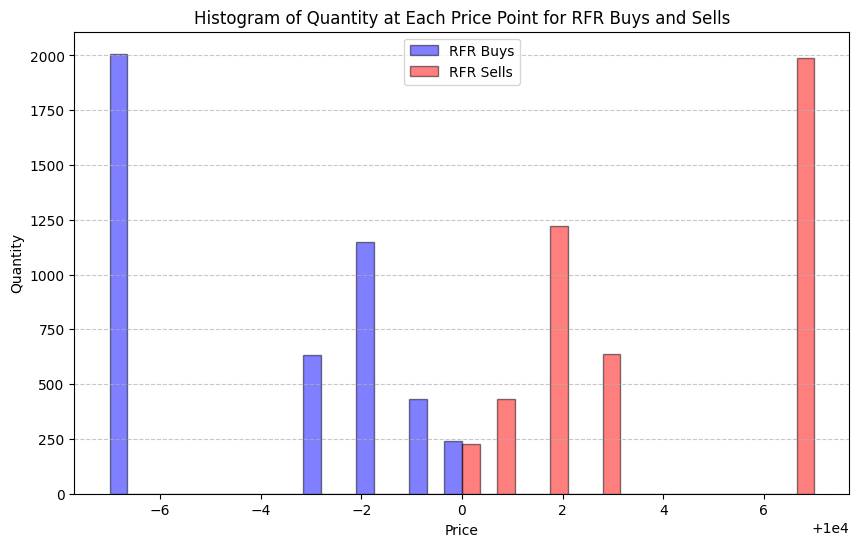

In [9]:
# Extract price and quantity data for rfr_buys and rfr_sells
buy_prices = [trade.price for trade in rfr_buys]
buy_quantities = [trade.quantity for trade in rfr_buys]

sell_prices = [trade.price for trade in rfr_sells]
sell_quantities = [trade.quantity for trade in rfr_sells]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buy_prices, weights=buy_quantities, bins=20, edgecolor='black', alpha=0.5, label='RFR Buys', color='blue')
plt.hist(sell_prices, weights=sell_quantities, bins=20, edgecolor='black', alpha=0.5, label='RFR Sells', color='red')
plt.title('Histogram of Quantity at Each Price Point for RFR Buys and Sells')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
rfr_bot_trades = [trade for trade in rfr_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
kelp_bot_trades = [trade for trade in kelp_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
squid_ink_bot_trades = [trade for trade in squid_ink_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
croissants_bot_trades = [trade for trade in croissants_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
jams_bot_trades = [trade for trade in jams_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
djembes_bot_trades = [trade for trade in djembes_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
pic1_bot_trades = [trade for trade in pic1_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']
pic2_bot_trades = [trade for trade in pic2_trades if trade.buyer != 'SUBMISSION' and trade.seller != 'SUBMISSION']

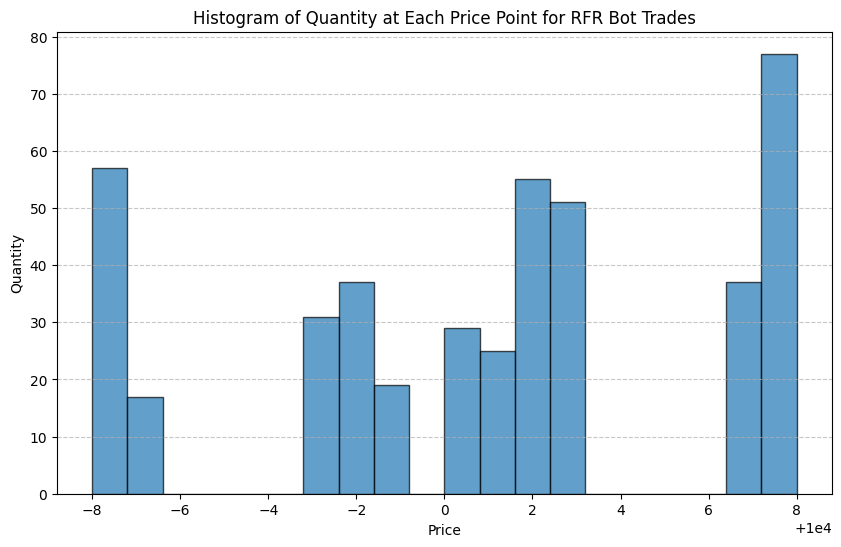

In [11]:
import matplotlib.pyplot as plt

# Extract price and quantity data
prices = [trade.price for trade in rfr_bot_trades]
quantities = [trade.quantity for trade in rfr_bot_trades]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, weights=quantities, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Quantity at Each Price Point for RFR Bot Trades')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

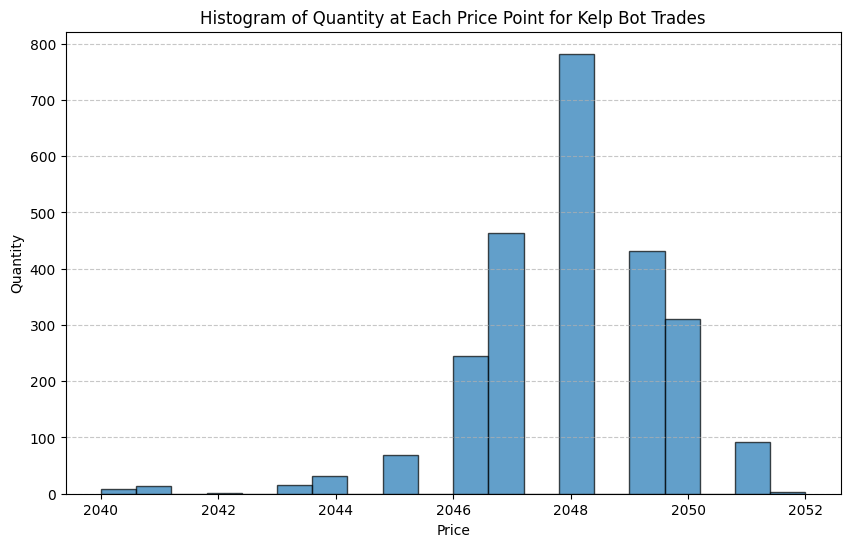

In [12]:

# Extract price and quantity data
prices = [trade.price for trade in kelp_bot_trades]
quantities = [trade.quantity for trade in kelp_bot_trades]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(prices, weights=quantities, bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Quantity at Each Price Point for Kelp Bot Trades')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

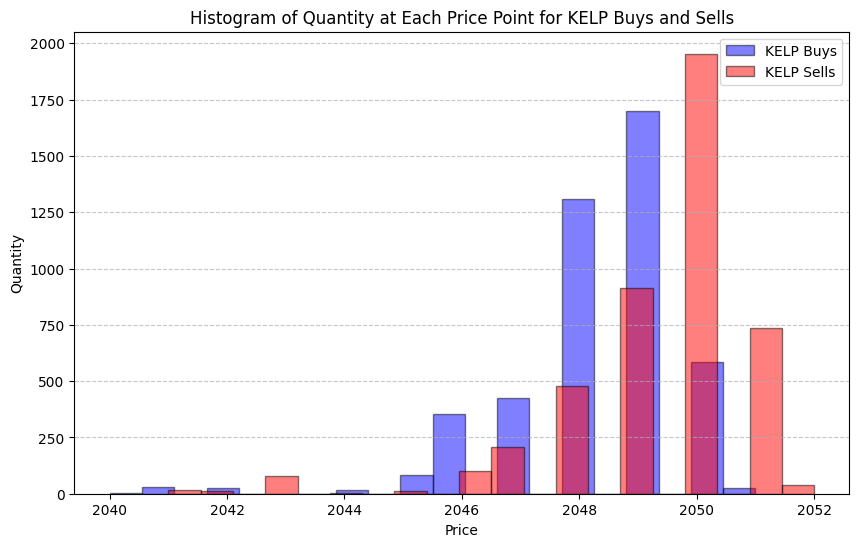

In [13]:
# Extract price and quantity data for rfr_buys and rfr_sells
buy_prices = [trade.price for trade in kelp_buys]
buy_quantities = [trade.quantity for trade in kelp_buys]

sell_prices = [trade.price for trade in kelp_sells]
sell_quantities = [trade.quantity for trade in kelp_sells]

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(buy_prices, weights=buy_quantities, bins=20, edgecolor='black', alpha=0.5, label='KELP Buys', color='blue')
plt.hist(sell_prices, weights=sell_quantities, bins=20, edgecolor='black', alpha=0.5, label='KELP Sells', color='red')
plt.title('Histogram of Quantity at Each Price Point for KELP Buys and Sells')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [31]:
rfr_pnl = - sum([trade.price * trade.quantity for trade in rfr_buys]) + sum([trade.price * trade.quantity for trade in rfr_sells])
print(f"RFR PnL: {rfr_pnl}")

kelp_pnl = - sum([trade.price * trade.quantity for trade in kelp_buys]) + sum([trade.price * trade.quantity for trade in kelp_sells])
print(f"Kelp PnL: {kelp_pnl}")

squid_ink_pnl = - sum([trade.price * trade.quantity for trade in squid_ink_buys]) + sum([trade.price * trade.quantity for trade in squid_ink_sells])
print(f"Squid Ink PnL: {squid_ink_pnl}")

croissants_pnl = - sum([trade.price * trade.quantity for trade in croissants_buys]) + sum([trade.price * trade.quantity for trade in croissants_sells])
print(f"Croissants PnL: {croissants_pnl}")

jams_pnl = - sum([trade.price * trade.quantity for trade in jams_buys]) + sum([trade.price * trade.quantity for trade in jams_sells])
print(f"Jams PnL: {jams_pnl}")

djembes_pnl = - sum([trade.price * trade.quantity for trade in djembes_buys]) + sum([trade.price * trade.quantity for trade in djembes_sells])
print(f"Djembes PnL: {djembes_pnl}")

pic1_pnl = - sum([trade.price * trade.quantity for trade in pic1_buys]) + sum([trade.price * trade.quantity for trade in pic1_sells])
print(f"Picnic Basket 1 PnL: {pic1_pnl}")

pic2_pnl = - sum([trade.price * trade.quantity for trade in pic2_buys]) + sum([trade.price * trade.quantity for trade in pic2_sells])
print(f"Picnic Basket 2 PnL: {pic2_pnl}")

total_realised_pnl = rfr_pnl + kelp_pnl + squid_ink_pnl + croissants_pnl + jams_pnl + djembes_pnl + pic1_pnl + pic2_pnl
print(f"Total Realised PnL: {total_realised_pnl}")

total_pnl = total_realised_pnl + total_outstanding_position_value
print(f"Total PnL: {total_pnl}")

RFR PnL: 537391
Kelp PnL: -15403
Squid Ink PnL: 0
Croissants PnL: -424775
Jams PnL: -1811546
Djembes PnL: -520330
Picnic Basket 1 PnL: -228946
Picnic Basket 2 PnL: 3522704
Total Realised PnL: 1059095
Total PnL: 42355.0


In [32]:
# basket realised arb pnl
basket_arb_pnl = croissants_pnl + jams_pnl + djembes_pnl + pic1_pnl + pic2_pnl
# unrealised arb 
basket_arb_unrlzd_pnl = (
    outstanding_croissants_position * activities_df[activities_df['product'] == 'CROISSANTS']['mid_price'].iloc[-1] +
    outstanding_djembes_position * activities_df[activities_df['product'] == 'DJEMBES']['mid_price'].iloc[-1] +
    outstanding_jams_position * activities_df[activities_df['product'] == 'JAMS']['mid_price'].iloc[-1] +
    outstanding_pic1_position * activities_df[activities_df['product'] == 'PICNIC_BASKET1']['mid_price'].iloc[-1] +
    outstanding_pic2_position * activities_df[activities_df['product'] == 'PICNIC_BASKET2']['mid_price'].iloc[-1]
)
total_basket_arb_pnl = basket_arb_pnl + basket_arb_unrlzd_pnl
print(f"Basket Arb PnL: {basket_arb_pnl}")
print(f"Basket Arb Unrealised PnL: {basket_arb_unrlzd_pnl}")
print(f"Total Basket Arb PnL: {total_basket_arb_pnl}")






Basket Arb PnL: 537107
Basket Arb Unrealised PnL: -536945.0
Total Basket Arb PnL: 162.0


In [ ]:
l